---

## Exploring AirBnB in Athens

A lot has been said and written about the effect of AirBnB in Athens. In this assignment, you will use the data collected by [Inside AirBnB](http://insideairbnb.com), so you can go ahead and download the Athens data from http://insideairbnb.com/get-the-data.html.

Once you do that, spend some time familiarizing yourself with the data and then go ahead and do the following tasks.

---

# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Reading Data

In [2]:
# Path file where our data belongs to
PATH_FILE = 'data/'

calendar_df = pd.read_csv(PATH_FILE + 'calendar.csv',
                         parse_dates=['date'])
listings_df = pd.read_csv(PATH_FILE + 'listings.csv')
reviews_df = pd.read_csv(PATH_FILE + 'reviews.csv',
                        parse_dates=['date'])

### House Listings Data

As we can see, our listings dataset, contains around 13k house listings, with 75 different columns.

In [3]:
listings_df.shape

(12955, 75)

We can take a closer look to some of the columns and actual values that this dataset contains, in order to get more familiar with it.

In [4]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

For this analysis, we won't use some of the columns given by our source, thus, it's wise to drop some columns just so that we can make out our data in a more niche way.


_(NOTE: I already knew after finishing my analysis which columns where not needed, thus deleted them to keep the outputs more clear.)_

In [5]:
listings_df.drop(columns=['scrape_id', 'last_scraped', 'source',
       'host_url', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood','neighbourhood_group_cleansed',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 
        'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'calendar_last_scraped',
        'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license','neighbourhood', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms',], inplace=True)

We can also rename some of the columns to have a clearer description of their purpose.

In [6]:
listings_df.rename(columns={"neighbourhood_cleansed": "neighbourhood"}, inplace=True)

Some useful columns that this dataset provides us with that involves airbnb listings, is which neighbourhood this listing belongs to, the price of each individual listing, and also number of reviews that it received etc.

In [7]:
listings_df.sample(5)

,id,listing_url,name,description,neighborhood_overview,picture_url,host_id,host_name,neighbourhood,latitude,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,reviews_per_month
1911,22723062,https://www.airbnb.com/rooms/22723062,Rental unit in Athina · 1 bedroom · 1 bed · 1 ...,Μοντέρνο διαμέρισμα για δύο<br /><br /><b>Regi...,Μπορείτε να βρείτε όλων των επιλογών μαγαζιά γ...,https://a0.muscache.com/pictures/b5b879ae-1d30...,97403776,Ilias,ΠΑΤΗΣΙΑ,38.011630,...,0,0,0,0,0,0,0,NaN,NaN,NaN
97,1274262,https://www.airbnb.com/rooms/1274262,Rental unit in Athens · ★4.08 · 2 bedrooms · 4...,<b>The space</b><br />Hi all! This is a spacio...,NaN,https://a0.muscache.com/pictures/19212015/efba...,6936206,Elena,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,37.993330,...,0,0,0,0,13,0,0,2013-09-05,2016-08-28,0.11
11448,900858906184453912,https://www.airbnb.com/rooms/900858906184453912,Guesthouse in Athina · ★4.0 · 1 bedroom · 1 be...,Вся группа с комфортом разместится в этом прос...,NaN,https://a0.muscache.com/pictures/a8812b3a-eda2...,516877650,Snizhana,ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,38.003589,...,30,60,90,365,4,4,1,2023-06-20,2023-09-04,1.28
1154,17041453,https://www.airbnb.com/rooms/17041453,Condo in Athina · ★4.75 · 3 bedrooms · 5 beds ...,Our recently renovated spacious apartment awai...,"The neighborhood is one of Athens' oldest, mos...",https://a0.muscache.com/pictures/2bb367d9-4fac...,122790066,Roza,ΚΕΡΑΜΕΙΚΟΣ,37.982640,...,6,17,47,293,211,22,2,2017-04-02,2023-09-03,2.68
10198,824486258712562970,https://www.airbnb.com/rooms/824486258712562970,Rental unit in Athina · ★4.83 · 1 bedroom · 1 ...,Fully renovated stylish studio in one of the m...,The apartment is located just a ten minute wal...,https://a0.muscache.com/pictures/miso/Hosting-...,90390850,Evan&Anetta,ΚΕΡΑΜΕΙΚΟΣ,37.983129,...,10,34,64,117,52,52,5,2023-02-27,2023-09-03,7.54


### Calendar Data

When it comes to calendar data, we observe that it contains about 470.000 calendar records.

In [8]:
calendar_df.shape

(4728229, 7)

We can tell by looking our dataframe, that this dataframe holds, for each listing it's id that uniquely identifies it, the date that this record is refering to, whether this listing is (or was) available or not during that date, and it's coresponding price.

In [9]:
calendar_df.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [10]:
calendar_df.sample(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
3175286,677570932073618963,2024-01-31,t,$40.00,$40.00,2,365
1078385,28798473,2024-02-24,t,$40.00,$40.00,2,1125
3010538,646901520966200072,2024-09-19,t,$90.00,$90.00,1,365
1857815,40885200,2024-07-28,t,$62.00,$62.00,1,5
704151,22895126,2023-11-07,f,$90.00,$90.00,2,1125


## Neighbourhood Listings in Descending Order

Show the listings per neighbourghood, with the most popular neighbourhoods first (that is, in decreasing neighbourhood popularity order).

* As we saw, each listing comes with each neighbourhood - the area that this house listing is located.

* We can start by inspecting per neighbourhood, how many house are listed for that specific neighborhood name, using the `groupby` function.

In [11]:
grouped_neighborhoods = listings_df.groupby('neighbourhood').size()
grouped_neighborhoods.head()

neighbourhood
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                       55
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                     38
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ    817
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                       99
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                    76
dtype: int64

* Since we want to look for the most popular neighbourhoods first, we ought to to find the most popular neighborhoods, which, for my analysis that means the neighbourhoods that most of the house are listed.

* We can leverage the `sort_values` function that will sort using, each neighborhood, from the neighborhood with the largest number of listings to the least one. 

In [12]:
# Resetting the index, and renaming the column for a clearer more understandable picture
sorted_neighborhoods = grouped_neighborhoods.sort_values(ascending=False).reset_index() \
                                                .rename(columns={0: 'number_of_listings'})
sorted_neighborhoods.head()

,neighbourhood,number_of_listings
0,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,2416
1,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,1122
2,ΝΕΟΣ ΚΟΣΜΟΣ,980
3,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,979
4,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,817


We can take a quick closer look by plotting a bar chart and observing the number of listings for each neighbourhood.

* `ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ` comes first with around 2500 listings. The result doesn't surprise us, as it is normal to have such a large amount of listings in a location that is very close to `Acropolis` and thus, tourist attracted especially during the summer season. 

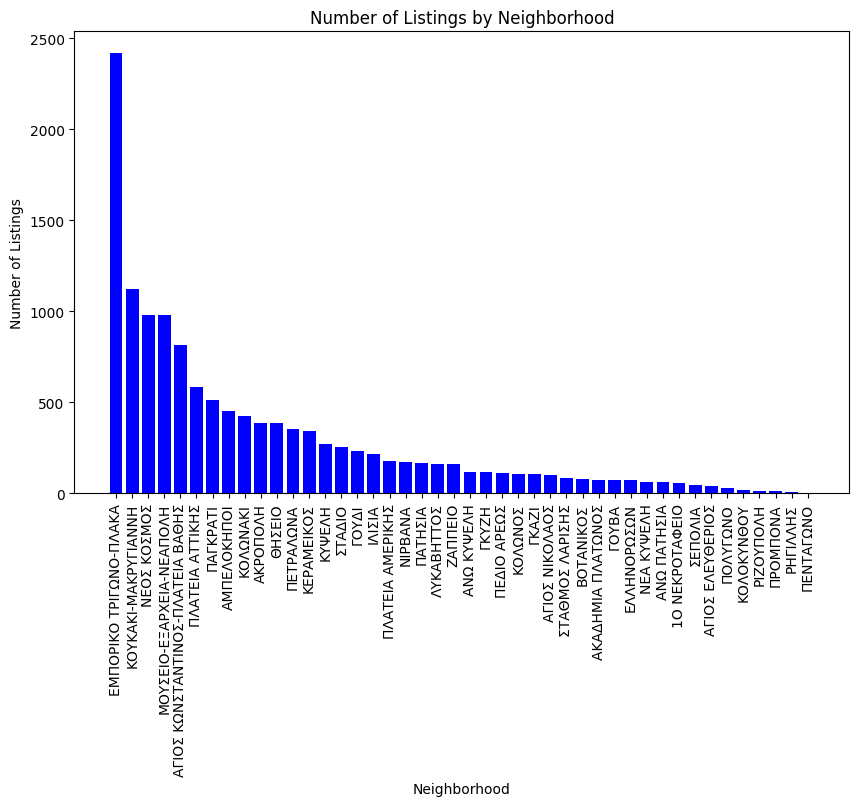

In [13]:
# Receiving the names and number of listings.
neighborhoods = sorted_neighborhoods['neighbourhood']
number_of_listings = sorted_neighborhoods['number_of_listings']

# Plotting our data.
plt.figure(figsize=(10, 6))
plt.bar(neighborhoods, number_of_listings, color='blue')
plt.ylabel('Number of Listings')
plt.xlabel('Neighborhood')
plt.title('Number of Listings by Neighborhood')
plt.xticks(rotation=90)
plt.show()

## Neighbourhood Prices in Descending Order

Create a table with the prices per neighbourhood. The prices information should contain:

* median price per neighbourhood

* mean price per neighbourhood

* standard deviation per neighbourhood

* number of listings per neighbourhood.

The contents of the table should be in descending median prices.

Since we need to work with prices for each listing, we will first need to check what are the unique price values that each individual listing receives, so that we can see if we would need to clean up any values before moving to the next step, which is the actual calculation.

<br/>

We notice that there are 4 groups of data that need to be handled properly:
* First we need to remove the $ currency sign for each price.
* Secondly, we need to handle the case that some prices happen to have a comma (,) and that's because it wouldn't help when trying to convert the string to a float.
* After we do these 2 steps of modifications, there are going to be some values that happen to have a 0 in the first position of the string, and of course, that also needs to be removed (NOTE: I have added a '0.00' as a "stop_price" in order to note remove it when encountering it).
* A final step would be to convert the string object to a float number

_NOTE: For purposes of this analysis, we won't be concerned on saving backups of older unprocessed prices, that's why I am modifying the original `prices` column of our dataframe._

In [14]:
listings_df['price'].sample(25).unique()

array(['$65.00', '$80.00', '$43.00', '$30.00', '$70.00', '$36.00',
       '$245.00', '$79.00', '$110.00', '$50.00', '$103.00', '$69.00',
       '$300.00', '$180.00', '$100.00', '$167.00', '$63.00', '$52.00',
       '$98.00', '$126.00', '$16.00', '$418.00', '$45.00', '$71.00'],
      dtype=object)

In [15]:
# Used to clean prices that follow common patterns in our unclean prices 
# section of the dataset.
def clean_price_dataframe(df, label):
    
    # Prices that should not be touched when trying to 
    # remove leading zeros.
    stop_prices = ['0.00']
    
    # Ensuring 'price' column is of string type.
    df[label] = df['price'].astype(str)

    # Removing dollar signs and commas from the 'price' column.
    df[label] = df['price'].str.replace(r'[\$,]', '', regex=True)

    # Removing leading zeros unless the price is in stop_prices.
    df[label] = df['price'].apply(lambda x: x.lstrip('0') if x not in stop_prices else x)

    # Converting the 'price' column to numeric.
    df[label] = pd.to_numeric(df['price'], errors='coerce')
    
    
clean_price_dataframe(listings_df, 'price')

In [16]:
listings_df['price'].head()

0    144.0
1     70.0
2     85.0
3     60.0
4     35.0
Name: price, dtype: float64

* After we have successfully cleaned our data, we can call the `agg` function that will calculate and, provide us with valuable summary statistics such as the mean, median, standard deviation that can then be used for further analysis.

In [17]:
# Grouping by the neighbourhood, and in the price columns, calling the aggregate function.
neighborhood_stats = listings_df.groupby('neighbourhood')['price'].agg(['mean', 'median', 'std', 'count']) \
                                                                 .sort_values(by='count', ascending=False) \
                                                                 .reset_index()

For better visualization of our table, we can perform these small adjustments for each of our columns after our aggregation calculations.

In [18]:
# Rounding the 'mean' and 'median' columns to two decimal places.
neighborhood_stats['mean'] = neighborhood_stats['mean'].round(2)
neighborhood_stats['median'] = neighborhood_stats['median'].round(2)
neighborhood_stats['std'] = neighborhood_stats['std'].round(2)

# Renaming columns for a clearer pictures.
neighborhood_stats = neighborhood_stats.rename(columns={
    'mean': 'Mean Price',
    'median': 'Median Price',
    'std': 'Standard Deviation',
    'count': 'Listing Count',
    'neighbourhood': 'Neighborhood'
})

Finally, we can sort by our `Median Price` and output our calculations.

* We can see that there is generally a high standard deviation in some neighbourhoods. Potential reasons for this phenomenon could be the presence of luxury or high-end properties mixed with more budget-friendly options within these neighborhoods, or even outliers.

In [19]:
neighborhood_stats = neighborhood_stats.sort_values(by='Median Price', ascending=False)


neighborhood_stats.head()

,Neighborhood,Mean Price,Median Price,Standard Deviation,Listing Count
42,ΡΗΓΙΛΛΗΣ,367.80,120.0,578.62,5
21,ΖΑΠΠΕΙΟ,224.07,114.0,641.16,161
0,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,140.65,104.0,229.18,2416
8,ΚΟΛΩΝΑΚΙ,128.60,100.0,104.43,425
9,ΑΚΡΟΠΟΛΗ,195.34,100.0,703.32,386


To get a better understanding of our data, we can plot the Standard Deviation Prices for each neighborhood to get a clearer picture of the diversity in housing prices across these different neighbourhoods.

Some noticable points are:

* We do confirm what we saw at our table output, that there is a group of neighbourhoods that generally has a high std.
* Despite that, we can see huge differences when comparing the neighborhood `ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ` std to every other neighborhood. It would be interesting to further investigate what's going on there.

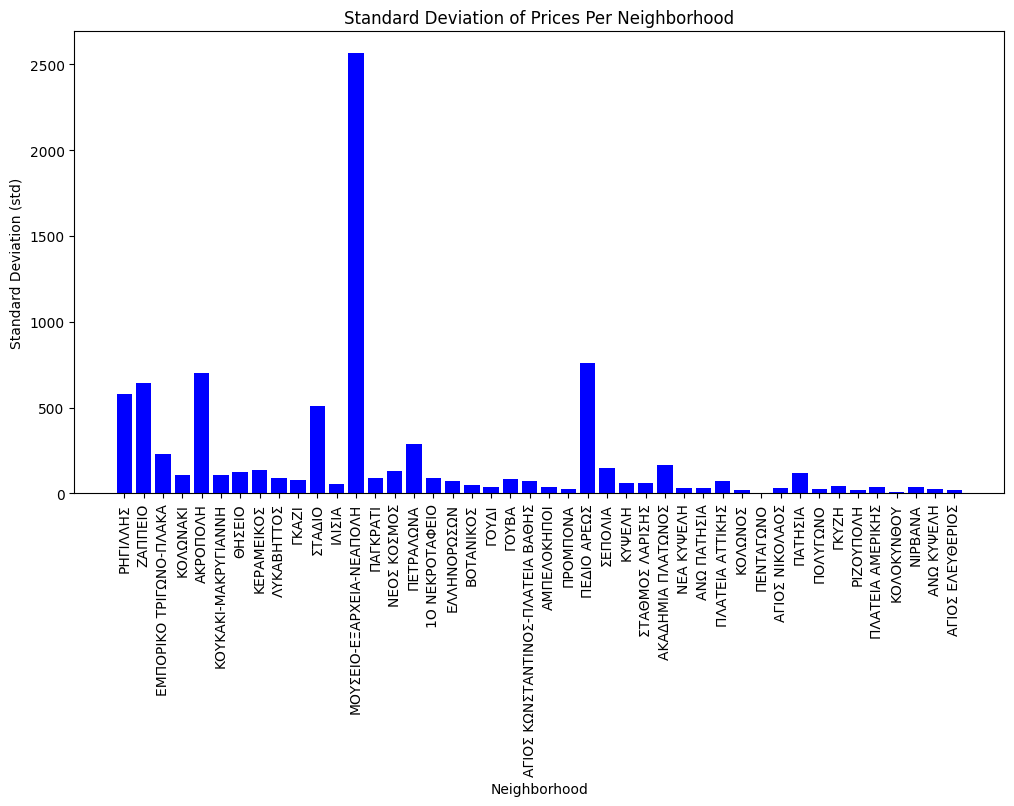

In [20]:
# Plotting for each neighbourhood each standard deviation

plt.figure(figsize=(12, 6))
plt.bar(neighborhood_stats['Neighborhood'], neighborhood_stats['Standard Deviation'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Standard Deviation (std)')
plt.title('Standard Deviation of Prices Per Neighborhood')

plt.show()

* We can filter out our `listings_df` and retrieve all the listing locations that belong to `ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ`.

* There are a total of 979 listings located there.

In [21]:
# Filtering our listings to only show 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ'.
neighborhood_filtered_listings = listings_df[listings_df['neighbourhood'] == 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ']
neighborhood_filtered_listings.shape

(979, 27)

In [22]:
neighborhood_filtered_listings.sample(5)[['id', 'name', 'price', 'neighbourhood']]

,id,name,price,neighbourhood
9823,795620112158374738,Rental unit in Athina · ★4.50 · Studio · 1 bed...,45.0,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ
4458,37074370,Rental unit in Athina · ★4.63 · 1 bedroom · 2 ...,38.0,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ
10099,821522442253390793,Rental unit in Athina · ★4.57 · 1 bedroom · 1 ...,61.0,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ
9202,725935683066196135,Condo in Athina · ★4.70 · 1 bedroom · 1 bed · ...,35.0,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ
11773,912194418858149848,Rental unit in Athina · 1 bedroom · 2 beds · 1...,82.0,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ


We can then plot a scatterplot to actually, make out per property type (that each listing belongs to), the price of that listing for our target neighbourhood `ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ`
<br/>

_(NOTE: It would be more suitable to use a boxplot instead of a scatterplot for outlier-detection purposes, I am only using a scatter plot here, because of how many different room categories we have)._

* We then observe an outlier in the property type `Entire rental unit`, that was the cause of our dramatic std increase.
* Looking more into this outlier, we see that it's listed price is about 100.000 euros, which contrasts by a lot with the typical pricing for a `Entire rental unit` listing in that area - that generally hovers around 200 euros with a maximum value of 1000 euros.
* Despite the significant price difference for this type of property, we cannot really conclude whether this listing's price is accidental or intentional. And this is due to the lack of sufficient information about the property's unique features or services that may have changed over the years.

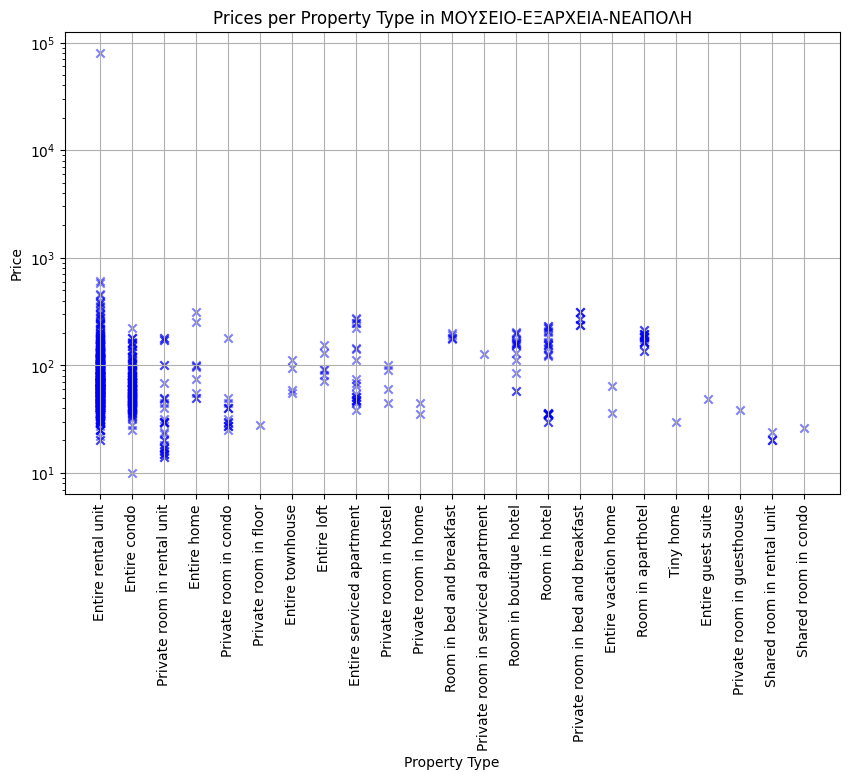

In [23]:
property_types = neighborhood_filtered_listings['property_type']
prices = neighborhood_filtered_listings['price']

plt.figure(figsize=(10, 6))
plt.scatter(property_types, prices, marker='x', color='blue', alpha=0.5)

plt.xlabel('Property Type')
plt.ylabel('Price')
plt.title('Prices per Property Type in ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ')

plt.xticks(rotation=90)
plt.grid(True)

plt.yscale('log')

plt.show()


When it comes to the variety of listings per neighbourhood in the area Athens of Greece, we can observe 3 different groups of neighbourhoods.

* Again, we can see that **ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ** appears to be the no.1 most listed neighborhood (neighborhood with most airbnb house listings).
<br/>
* We can also, observe the existence of two distinct groups of listings, one group of listings that appears to be highly "active". These listings stand out due to to their close distance to Athen's city center, making them ideal for tourists.
* There is also this group that is less 'active', these house listings appear to have neighbourhoods that that are some-what distant from the city center, and therefore, may not "possess" the same level of appeal to tourists and travellers.

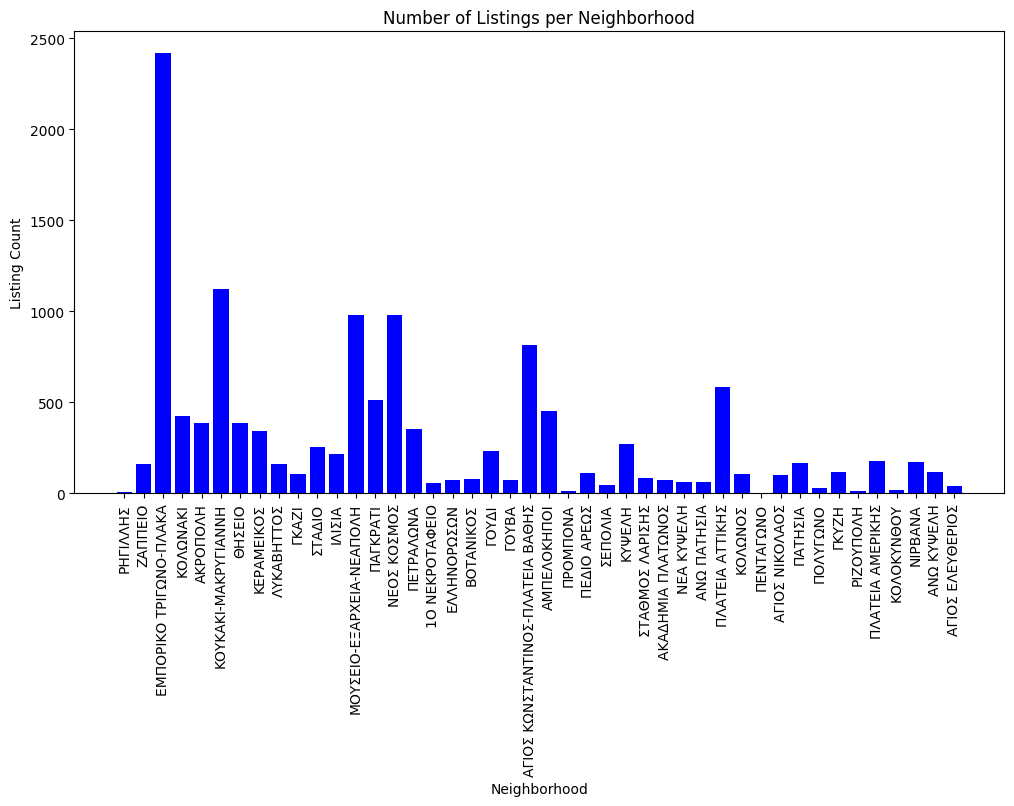

In [24]:
neighborhoods = neighborhood_stats['Neighborhood']
listing_counts = neighborhood_stats['Listing Count']

plt.figure(figsize=(12, 6))
plt.bar(neighborhoods, listing_counts, color='blue')
plt.xlabel('Neighborhood')
plt.ylabel('Listing Count')
plt.title('Number of Listings per Neighborhood')
plt.xticks(rotation=90)

plt.show()

## Availability per Day

Create a plot with the number of listings available per day, on the $y$ axis, and the date, on the $x$ axis.

First of, we start by taking a second look of our data.
* As we already saw our calendar dataframe has calendar records for each listing, and for each listing we have valuable information on whether that listing was available or not during that date, each price and several more columns.

In [25]:
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,2023-09-21,f,$150.00,$60.00,1,180
1,10595,2023-09-22,t,$150.00,$60.00,1,180
2,10595,2023-09-23,t,$150.00,$75.00,1,180
3,10595,2023-09-24,t,$150.00,$90.00,1,180
4,10595,2023-09-25,f,$300.00,$210.00,1,180


* We can observe that our records, have dates that actually surpass our current year (2023).

* They are just records that are listed during the year 2024, and may or may not be yet booked.

In [26]:
calendar_df.date.unique()

<DatetimeArray>
['2023-09-21 00:00:00', '2023-09-22 00:00:00', '2023-09-23 00:00:00',
 '2023-09-24 00:00:00', '2023-09-25 00:00:00', '2023-09-26 00:00:00',
 '2023-09-27 00:00:00', '2023-09-28 00:00:00', '2023-09-29 00:00:00',
 '2023-09-30 00:00:00',
 ...
 '2024-09-10 00:00:00', '2024-09-11 00:00:00', '2024-09-12 00:00:00',
 '2024-09-13 00:00:00', '2024-09-14 00:00:00', '2024-09-15 00:00:00',
 '2024-09-16 00:00:00', '2024-09-17 00:00:00', '2024-09-18 00:00:00',
 '2024-09-19 00:00:00']
Length: 365, dtype: datetime64[ns]

* We know can filter our calendar dataframe so that it holds only the house listings that are (or were) available.

* Finally, we use the `groupby` method to group them by their date.

In [27]:
# Filtering only the available listings from our calendar, and grouping by the date
available_date = calendar_df[calendar_df['available'] == 't']
grouped_data = available_date.groupby('date')

grouped_data.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1,10595,2023-09-22,t,$150.00,$60.00,1,180
2,10595,2023-09-23,t,$150.00,$75.00,1,180
3,10595,2023-09-24,t,$150.00,$90.00,1,180
9,10595,2023-09-30,t,$150.00,$150.00,1,180
10,10595,2023-10-01,t,$150.00,$150.00,1,180
...,...,...,...,...,...,...,...
24456,724485,2023-09-22,t,$35.00,$35.00,3,1125
25185,727374,2023-09-21,t,$34.00,$32.00,3,1125
25915,767272,2023-09-21,t,$350.00,$350.00,3,1125
26280,780733,2023-09-21,t,$300.00,$300.00,2,1125


After our grouping, we can find, for each date
the size of the group it belongs to, which corresponds to the number of available listings for that specific date.

_For example,`2023-09-21` maps to 540 house listings, while `2023-09-22` corresponds to 982 house listings etc._

In [28]:
# Receing for each date, the number of listings available.
data = grouped_data.size()

# Index shows the dates.
data.index

DatetimeIndex(['2023-09-21', '2023-09-22', '2023-09-23', '2023-09-24',
               '2023-09-25', '2023-09-26', '2023-09-27', '2023-09-28',
               '2023-09-29', '2023-09-30',
               ...
               '2024-09-10', '2024-09-11', '2024-09-12', '2024-09-13',
               '2024-09-14', '2024-09-15', '2024-09-16', '2024-09-17',
               '2024-09-18', '2024-09-19'],
              dtype='datetime64[ns]', name='date', length=365, freq=None)

In [29]:
# Values shows the available listings that is mapped from an index .
data.values

array([ 540,  982, 1475, 2495, 3194, 3484, 3528, 3135, 2718, 2981, 3972,
       4551, 4961, 5039, 4728, 4578, 4606, 5140, 5696, 6047, 6052, 5780,
       5483, 5390, 5934, 6300, 6557, 6632, 6359, 6132, 6132, 6612, 6989,
       7264, 7314, 7185, 7074, 7027, 7453, 7758, 8057, 8066, 8143, 8164,
       8264, 8630, 8752, 8788, 8735, 8229, 7312, 7121, 7630, 8543, 8979,
       9118, 9025, 8917, 8934, 9206, 9361, 9407, 9376, 9240, 9110, 9147,
       9425, 9593, 9654, 9606, 9548, 9425, 9450, 9635, 9708, 9734, 9703,
       9574, 9523, 9542, 9732, 9792, 9796, 9715, 9684, 9691, 9723, 9820,
       9846, 9849, 9287, 9208, 9127, 8991, 8942, 8907, 8848, 8767, 8639,
       8487, 8397, 8448, 8385, 8615, 8785, 8885, 8974, 9108, 9172, 9176,
       9179, 9174, 9127, 9132, 9155, 9201, 9206, 9191, 9213, 9213, 9184,
       9196, 9212, 9224, 9238, 9233, 9235, 9226, 9240, 9281, 9298, 9319,
       9344, 9276, 9263, 9263, 9297, 9295, 9308, 9308, 9280, 9274, 9264,
       9264, 9270, 9287, 9281, 9254, 9257, 9259, 92

We can continue with the data preparation stage, by defining methods that will prepare our labels that are going to be used for plotting our graph.

* Because we want to find out the number of listings per day, it would not be practical to display each single date in our plot. Thus, we will show only the month followed by the year based on our original date.

* This means that for each new month and its corresponding year in our dataset, we'll have a label on the x-axis.

In [30]:
# Converting our date index to a datetime format.
data.index = pd.to_datetime(data.index)

def get_month_labels(dates):
    
    """
    Generates month-year labels from a list of dates.

    This function takes a list of dates and creates labels representing
    the months followed by the year corresponding to each date. 
    The function ensures that a new label is generated only when the month 
    changes in the input date list.
    
    """
    labels = []
    current_month = None
    
    # Iterate through the data and identify the start of each new month
    for date in dates:
        # Starting a new month, add that month
        if date.month != current_month:
            month = date.strftime('%b %Y')
            labels.append(month)
            current_month = date.month
        # Not a new month, add None
        # (NOTE: We still need to capture this 'None' value for our plotting)
        else:
            labels.append(None)
    
    return labels


labels = get_month_labels(data.index)

Finally, we can plot our data values for each date, we use the `enumerate` function to receive the index in the list and the actual element of that index.

* Each vertical line that is shown on the plot, corresponds to the point from which a new month starts, remember that we have already saved our month-year pair to the `labels` list.
<br /> 

* We can see that the number of listings keeps increases more and more, from September until December. This sudden increase could be because of how very little listings where available from the starting of our data set which is September, and that can also be explained due to the summer season inavailabilities.
<br /> 
* Despite that, we cannot say much about the number of listings after the month of January, where from there and on, we have a straight line parallel to the x axis. That is, because some of those listings may or may not be yet rented.
* However, this sudden decrease of listings availability that we can see from the month June (start of summer), could possibly indicate, early rent-bookings of Airbnb listings in summer season, from tourists that want to get the lowest possible price during that month.

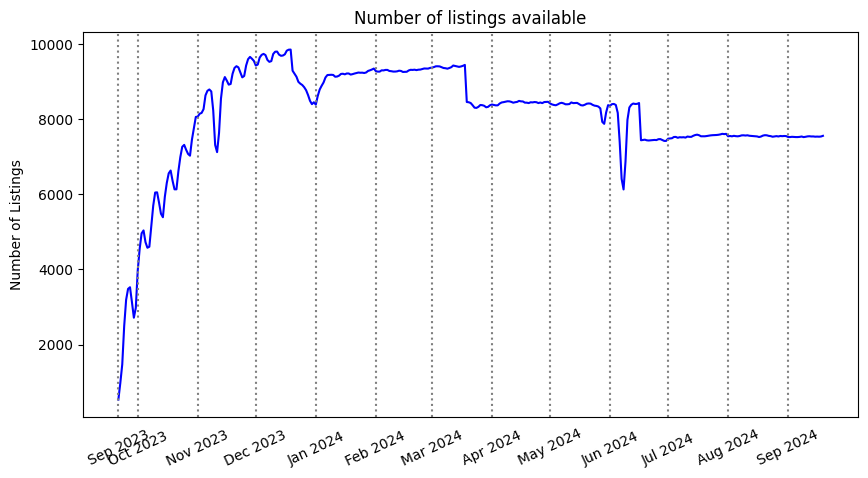

In [31]:
# Plotting 

plt.figure(figsize=(10, 5))
plt.plot(data.values, 'b-')
plt.ylabel('Number of Listings')
plt.title('Number of listings available')

plt.xticks([])


# Add vertical lines for the start of each month.
# We are looping through each label values that we saved earlier in the get_months_labels function.
for i, label in enumerate(labels):
    
    # If label is a valid month, that means, we have moved to a new month
    # Draw a vertical line showing the position in the x axis where this month begins and the actual month.
    
    if label:
        plt.axvline(x=i, color='grey', linestyle=':', linewidth=1.5)
        plt.text(i, -1200, label, rotation=25, ha='center')


plt.show()

## Reviews, Occupacy per Listing, Average Income

Create a histogram showing the number of reviews per listing. The histogram should bin the number of reviews, from the smallest amount of reviews in a listing, to the maximum number of reviews in a listing rounded up to the closest hundred.

Once you have done that, calculate the average occupacy per listing per month. To calculate that, find the average reviews per month and assume that half of the bookings result in reviews.

Then, assuming that each booking is for a three nights stay, calculate the average income per month, using the average price charged throughout all listings.

## Number of Reviews Per Listing

We can first start by finding the number of reviews for each listing.

In [32]:
reviews_df.sample(5)

,listing_id,date
28188,3117246,2018-02-20
284594,25528569,2018-06-11
133326,16221281,2022-01-06
141624,16949857,2020-10-11
474887,41865514,2023-06-12


In [33]:
reviews_per_listing = listings_df['number_of_reviews']
reviews_per_listing.reset_index().sample(5)

,index,number_of_reviews
7717,7717,99
9346,9346,4
78,78,7
8421,8421,17
609,609,203


* We can then move on to creating our bins.

* By using the `min()` and `max()` functions we can find the review with the least and largest amount of reviews.

In [34]:
smallest_amount_reviews = reviews_per_listing.min()
largest_amount_reviews = reviews_per_listing.max()

In [35]:
smallest_amount_reviews

0

In [36]:
largest_amount_reviews

865

* We then calculate the upper limit for our histogram bins by rounding up the largest number of reviews to the nearest hundred using the `np.ceil` function. So if the largest reviewed listing is 350, it will be rounded up to 400.

* We then define the bins for the histogram, starting from the smallest number of reviews and incrementing by 100 up to the rounded-up upper limit. 

In [37]:
# Rounding up the largest amount of reviews to the closest 100 by using np.ceil
largest_rounded_up = np.ceil(largest_amount_reviews / 100) * 100
bins = np.arange(smallest_amount_reviews, largest_rounded_up + 100, 100)

In [38]:
largest_rounded_up

900.0

Finally, we plot our histogram.

* We can clearly see that, most listings (around 12.000) received around [0,100] reviews.

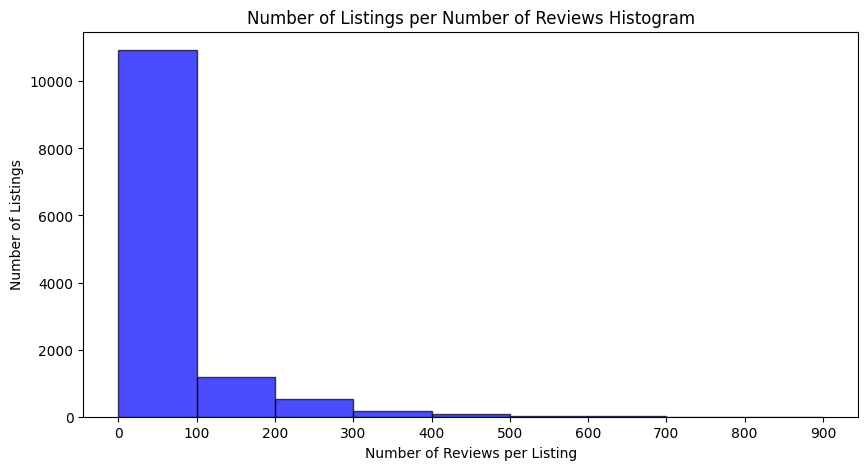

In [39]:
plt.figure(figsize=(10, 5))
plt.hist(reviews_per_listing, bins=bins, color='blue', edgecolor='black', alpha=0.7)

plt.title('Number of Listings per Number of Reviews Histogram')
plt.xlabel('Number of Reviews per Listing')
plt.ylabel('Number of Listings')

x_ticks = range(0, int(largest_rounded_up) + 1, 100)
plt.xticks(x_ticks)

plt.show()

* However, because we are working with large distributions of data where we have 1 bin that has more than 10000 records and other's that have less than 1000, it would be difficult to find out exacltly how much data belong to those bins.

* That's why we can change the y axis to be in logarithmic scale, and thus get a clearer picture about our data.

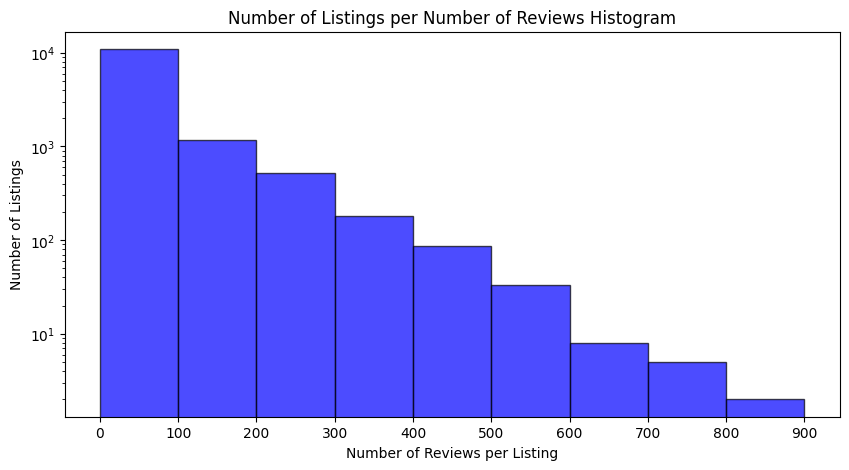

In [40]:
plt.figure(figsize=(10, 5))
plt.hist(reviews_per_listing, bins=bins, color='blue', edgecolor='black', alpha=0.7)

plt.title('Number of Listings per Number of Reviews Histogram')
plt.xlabel('Number of Reviews per Listing')
plt.ylabel('Number of Listings')

plt.yscale('log')

x_ticks = range(0, int(largest_rounded_up) + 1, 100)
plt.xticks(x_ticks)


plt.show()

We can however, further take a look if listings with small reviews or equal to 0, hugely affected our [0,100] bin histogram or not.

* By observing our plot, the presence of listings with low reviews (which of course is expected), specifically those with a reviews in the range [0, 10], is not expected to significantly impact our histogram of reviews in the range of [0, 100]. 
* With only a relatively small number of listings, falling into this category out of approximately 12,000 listings in the [0, 100] range, their influence on the overall distribution should be minimal. 

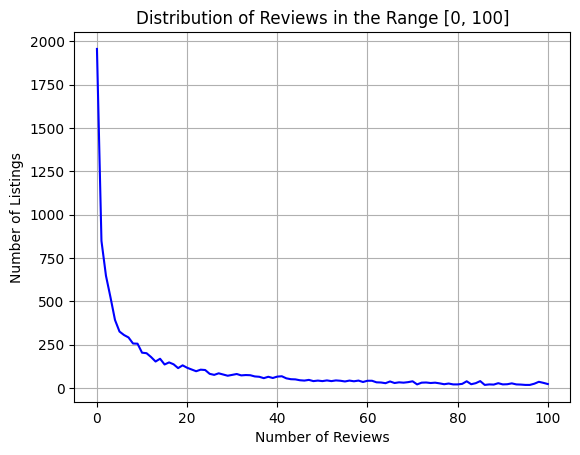

In [41]:
# Receiving the listings that have a range of reviews inside the [0,100]
review_counts = reviews_per_listing[(reviews_per_listing >= 0) & (reviews_per_listing <= 100)] \
                                                                    .value_counts().sort_index()
review_values = review_counts.index
review_counts = review_counts.values

plt.plot(review_values, review_counts, color='blue', linestyle='-')
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Listings")
plt.title("Distribution of Reviews in the Range [0, 100]")
plt.grid(True)
plt.show()

## Average Occupacy / Income Per Listing

Moving on, we will now start working on finding the average occupancy per listing per month.

* We already have some information for each listing, we know the average `reviews_per_month` for that listing. However, these information is captured and calculated based on the reviews each listing got, from the year it received it's first review, all the way to this current year.

* We can shortly confirm that by taking for example a listing with `id` 10595. It has a total number of 42 listings, and it received it's first review on 2011. 

In [42]:
listing_target = listings_df[listings_df['id'] == 10595][['number_of_reviews', 'first_review', 'reviews_per_month']]
listing_target

,number_of_reviews,first_review,reviews_per_month
0,42,2011-05-20,0.28


* We then calculate based on the year that it received the first review, to this currect year, which is 12 years or 144 months.
* Thus, by dividing the number of listings with 144, we get our estimation.

In [43]:
listing_target['estim_reviews_per_month'] = listing_target['number_of_reviews'] / 144
listing_target['estim_reviews_per_month']

0    0.291667
Name: estim_reviews_per_month, dtype: float64

* We then compare our actual reviews per month provided by our dataset, with our estimation, with a `tolerance` of 0.02, confirming our starting hypothesis.

In [44]:
tolerance = 0.02
actual_reviews_per_month = listing_target['reviews_per_month']

np.isclose(listing_target['estim_reviews_per_month'], actual_reviews_per_month, atol=tolerance, rtol=0)

array([ True])

Moving on, to have a more up-to-date and relevant 'snapshot' of our data we will focus on the most recent data, that is the most recent 12-month period that reviews where captured for each listing.

* We can begin by finding a good 'starting point' for capturing our reviews. Because we lack information about reviews for listings after October 2023, we can start our analysis from September 2022. Thus, capture information from September 2022 all the way to September 2023.

* Starting from September will allow us to not only work with a complete 12-month period of data, but also ensure that we will capture patterns across the entire year.

In [45]:
reviews_2023 = reviews_df[reviews_df['date'].dt.year == 2023]

reviews_2023['date'].dt.month_name().unique()

array(['January', 'February', 'March', 'May', 'June', 'September',
       'April', 'July', 'August'], dtype=object)

Our reviews dataset during September 2023, has captured reviews from 1st of September all the way to 21 of September.

In [46]:
reviews_2023[reviews_2023['date'].dt.month_name() == 'September']['date'].dt.day.unique()

array([10, 17, 11,  4,  3,  6,  9,  7,  5, 15,  8, 14, 12, 13,  2,  1, 18,
       16, 19, 20, 21], dtype=int32)

* We can select as starting point (`start_date`) the date 1st of September 2022, and as an end point (`end_date`) the date 1st of September 2023.

* After selecting our starting/ending points, we can move forward to actually filtering the dataset. That can be done, by enforcing our listings dates to be in-between our specified points.

In [47]:
start_date = pd.to_datetime('2022-09-01')
end_date = pd.to_datetime('2023-09-01')

# Filtering the dataframe
reviews_past_year = reviews_df[(reviews_df['date'] >= start_date) & (reviews_df['date'] <= end_date)]

years = reviews_past_year['date'].dt.year.unique()
num_dates_captured = len(reviews_past_year['date'].unique())

print(f'Years captured : {years}. Total days captured : {num_dates_captured}')

Years captured : [2023 2022]. Total days captured : 366


* With our filtered data in-set, by grouping by the column which uniquely identifies each listing (id) and getting the size of each group, we effectively find the total numbers of reviews for each listings.

* To find the average reviews per month, we can divide by 12, since we have captured data for 1 year.

In [48]:
reviews_last_year = reviews_past_year.groupby('listing_id').size().reset_index().rename(columns={0:"reviews"})
reviews_last_year['avg_reviews_per_month'] = reviews_last_year['reviews'] / 12


reviews_last_year.head()

,listing_id,reviews,avg_reviews_per_month
0,10595,7,0.583333
1,10990,3,0.250000
2,10993,5,0.416667
3,10995,1,0.083333
4,27262,2,0.166667


* By knowing our reviews per month, because we made the assumption that that half of the bookings result in reviews, by multiplying by 2 we can find the average bookings per month as an approximation.

* We can also remove any `NaN` rows as they do not carry any meaningful information.

In [49]:
# Creating a new dataframe for the avg occupancy per listings
average_occupancy_per_listing_per_month = pd.DataFrame({
    'listing_id' : reviews_last_year['listing_id'],
})

average_occupancy_per_listing_per_month['occupancy_per_month'] = (reviews_last_year['avg_reviews_per_month'] * 2)\
                                                                                                        .dropna()

average_occupancy_per_listing_per_month.sample(5)

,listing_id,occupancy_per_month
7011,746138771654576546,0.666667
2826,34436459,7.500000
8149,863587356393700154,5.500000
6437,676528490215344580,5.666667
5313,54263009,0.833333


## Income per Month / Average Income of a listing

To find the income per month for each listing, we need to know how much, on average a listing costs per month. Then, because we know for each listing the occupancy it gets per month, and by assuming that, again, on average each booking is for a three-night stay, we will get an estimate on how much these listings makes on a monthly basis.

We can start by cleaning-up some of our price values, just because right now they are currently stored as string objects and contain currency symbols, which does not help us when trying to perform basic mathematical operations.

In [50]:
calendar_df['price'].unique()

array(['$150.00', '$300.00', '$250.00', ..., '$764.00', '$835.00',
       '$3,233.00'], dtype=object)

We can use the `clean_price_dataframe` function that we introduced earlier and handled the cleaning process of our listings.

In [51]:
clean_price_dataframe(calendar_df, 'price')
calendar_df['price'].head()

0    150.0
1    150.0
2    150.0
3    150.0
4    300.0
Name: price, dtype: float64

We can also observe that none of our calendar pricings contain `NaN` values, which could significantly affect the calculations as they represent missing or undefined values.

In [52]:
calendar_df['price'].isna().unique()

array([False])

Since our prices are now clean, our next step is to find out how much each listing costs on average, per month.

* Because we don't have, even an estimation of how much our listings costed in year 2022 (in the area we are researching), we are going to have to make the assumption that the prices did not change significantly for this period of year.

* Thus, by using the `calendar_df` which shows per date how the prices change for each listing, we can estimate per month how much each listings costs.

* This can be done, by first extracting the month out of each date as a separate column

In [53]:
# Creating a column that shows the month that date corresponds to.
calendar_df['month'] = calendar_df['date'].dt.month_name()

* and then by performing the mean operation in the `price` column of the grouped pair _listing_id-month_, since we have multiple values per days for a specific month.

In [54]:
average_price_per_month = calendar_df.groupby(['listing_id', 'month'])['price'].mean().reset_index()
average_price_per_month.head()

,listing_id,month,price
0,10595,April,300.000000
1,10595,August,300.000000
2,10595,December,185.483871
3,10595,February,300.000000
4,10595,January,293.548387


* We then use the `merge` to effectively merge our 2 already calculated dataframes, the `average_price_per_month` dataframe, with the`average_occupancy_per_listing_per_month` on the `listing_id` variable (which uniquely identifies each listing), in order for us to calculate the income for each listing and for each month.

In [55]:
# Merging our 2 dataframes we calculated previously based on the listing id
merged_data = pd.merge(average_price_per_month, average_occupancy_per_listing_per_month, on=['listing_id'])

# Multiplying by 3 since we have assumed that each booking is for a three-night stay.
merged_data['income'] = merged_data['occupancy_per_month'] * merged_data['price'] * 3

merged_data.head()

,listing_id,month,price,occupancy_per_month,income
0,10595,April,300.000000,1.166667,1050.000000
1,10595,August,300.000000,1.166667,1050.000000
2,10595,December,185.483871,1.166667,649.193548
3,10595,February,300.000000,1.166667,1050.000000
4,10595,January,293.548387,1.166667,1027.419355


* Last step will be to calculate the mean out of all the incomes we calculated, per listing.

In [56]:
average_income_per_listing = merged_data.groupby('listing_id')['income'].mean().reset_index()

average_income_per_listing.sample(10)

,listing_id,income
8160,864508320630813160,190.776974
1877,26994600,141.357759
4931,52183781,825.551724
5059,53025916,450.000000
8299,875887657933155725,773.333454
6922,731636347109575327,114.574552
7010,746130372390161103,196.754097
636,15203874,81.000000
4493,50017463,339.955311
8333,877983612394064903,502.940304


* Finally, by using again the mean function, we can find out how much a listing cost on average per month.

* It's **important** to note here, that the prices calculated may be impacted by outliers that we found previously, thus, the  prices we just computed should be interpreted with the knowledge that these extreme values may have skewed our results.

In [57]:
average_income_per_listing_per_month = average_income_per_listing['income'].mean()
average_income_per_listing_per_month

1057.0363672351605

## Listings per Room Type

Show the number of listings per room type, in absolute numbers, and also in percentages (the percentage of listings for each particular room type). Then, show the number of listings per neighrbourhood and room type.

We can find out the number of listings per room type by using again, the `groupby` function and finding the size of each group.

* The result doesn't surprise us, despite Airbnb having a unique variety of house types, Greece, and especially Athens isn't really known to offer a variety of different types of houses.

* We can see that a regular house or appartment is the most common room for listings.

In [58]:
room_type_counts = listings_df.groupby('room_type').size()
room_type_counts

room_type
Entire home/apt    11652
Hotel room           105
Private room        1113
Shared room           85
dtype: int64

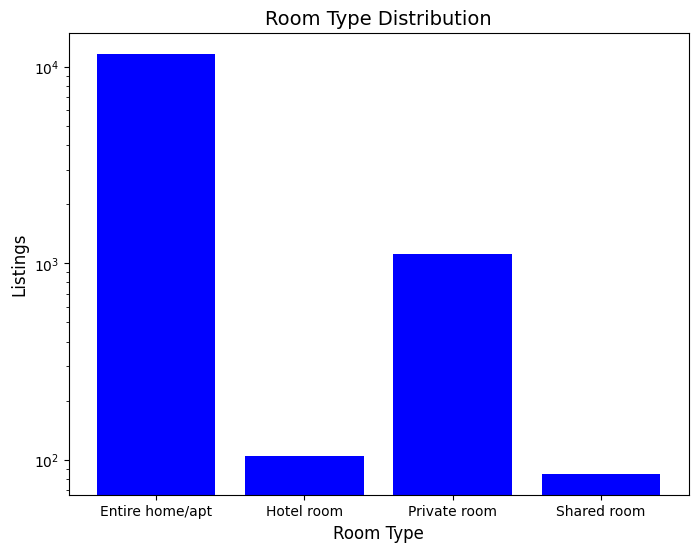

In [59]:
# Plotting our bar chart, where room_type_counts.index is the labels on the x axis
# and room_type_counts are the mapped listing counts for each label

plt.figure(figsize=(8, 6))
plt.bar(room_type_counts.index, room_type_counts, color='blue')
plt.title('Room Type Distribution', fontsize=14)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Listings', fontsize=12)
plt.xticks(rotation=0) 

plt.yscale('log')

plt.show()

We can also find the same result/distribution of house types in percentages by taking the number of listings that fall to each category, and dividing it by the total number of listings we have.

In [60]:
percentage = (((room_type_counts / room_type_counts.sum() * 100).round(2)).reset_index()) \
                                                    .rename(columns={0:"percentage"})
percentage

,room_type,percentage
0,Entire home/apt,89.94
1,Hotel room,0.81
2,Private room,8.59
3,Shared room,0.66


Finally, it would also be useful to also see what room types does each neighborhood have to provide.

* We can see for example that, `ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ` offers 3 room types, with `Entire home/apt` being the most popular choice for the hosts for that neighbourhood, to host.

In [61]:
grouped_room_neighborhoods = listings_df.groupby(['neighbourhood', 'room_type'])
grouped_room_neighborhoods.size().tail()

neighbourhood    room_type      
ΣΤΑΔΙΟ           Private room       11
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ  Entire home/apt    73
                 Hotel room          4
                 Private room        4
                 Shared room         4
dtype: int64

## Prices per Day

Create a table with the average price per listing per day. Draw a graph visualizing the table.

As we have already seen, our calendar dataframe shows us for each listing, the date that this listing is for, the availability and its corresponding price.

In [62]:
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month
0,10595,2023-09-21,f,150.0,$60.00,1,180,September
1,10595,2023-09-22,t,150.0,$60.00,1,180,September
2,10595,2023-09-23,t,150.0,$75.00,1,180,September
3,10595,2023-09-24,t,150.0,$90.00,1,180,September
4,10595,2023-09-25,f,300.0,$210.00,1,180,September


We are interested to see how the dates affect the price of our listings. (or similarly, how prices change overtime)

We can now start by grouping by each date of our calendar and calculating the average price for that date.

In [63]:
average_price_per_day = calendar_df.groupby('date')['price'].mean().reset_index()
average_price_per_day_date = average_price_per_day.date

average_price_per_day.sample(5)

,date,price
106,2024-01-05,147.276131
58,2023-11-18,109.301143
234,2024-05-12,174.726803
54,2023-11-14,105.297591
277,2024-06-24,177.669986


* After having our data ready, we know need to start the preparation data and more specifically, the months that are going to be displayed on our plot. 

* For that, we can leverage the `get_month_labels` that we used, and implemented earlier. As a reminder, it will return a list of labels which correspond to the months as text from our `average_price_per_day` dataframe.

In [64]:
# Converting our date index to a datetime format.
average_price_per_day_dates = pd.to_datetime(average_price_per_day_date)

labels = get_month_labels(average_price_per_day_dates)

* By looking at our plot, we can observe an increasing price relative to the month. While the avg prices are quite low on September 2023 until mid December 2023. The price gradually start to increment more and more, reaching a maximum price of 200 euros on average. 
* This makes sense, because, we are gradually approaching seasonal months.
<br /> 

* It is also very interesting to see that, we have a sudden increase of the price listings from mid June to July. We saw earlier however, from the `Number of listings available` plot, that there was a sudden decrease of listings availabilities at the same range of dates!

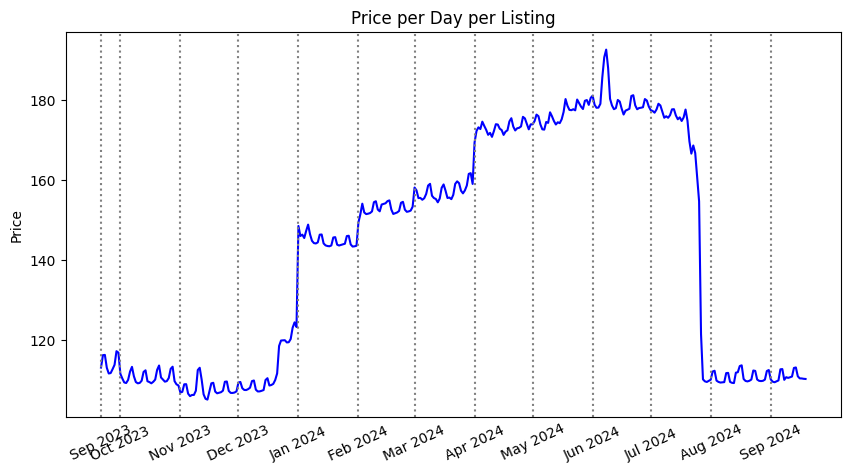

In [65]:
plt.figure(figsize=(10, 5))
plt.plot(average_price_per_day.price, 'b-')
plt.ylabel('Price')
plt.title('Price per Day per Listing')
plt.xticks([])

# Add vertical lines for the start of each month
for i, label in enumerate(labels):
    
    # If label is a valid month, that means, we have moved to a new month
    # Draw a vertical line showing the position in the x axis where this month begins and the actual month.
    
    if label:
        plt.axvline(x=i, color='grey', linestyle=':', linewidth=1.5)
        plt.text(i,90, label, rotation=25, ha='center')


plt.show()

## Listings per Host

Create a table with the number of listings per host, in descending order. Create a graph that will show the distribution of listings per host, as follows:

* You will rank the host on a number of listings basis. So, the first host will be the one with the largest number of listings, the second host will be the one with the second largest number of listings, etc. If there is a number of hosts with the same listings, just add them in sequence. For instance, if there are 10 hosts with one listing each, add them in the ranking with any order between them.

* On the $y$ axis you will have the number of listings.

That is, a point $(x, y)$ will mean that the $x$-th highest hosting host has $y$ listings.

After you have drawn the plot, do another one, this time with the $x$ axis in *logarithmic* scale.

We can start, by grouping by the host's id, which uniquely identifies each host, and getting the size of each "group". That will give us our first sight of the total listings provided by each host.

In [66]:
listings_per_host = listings_df.groupby('host_id').size().reset_index(name='listings_count')

listings_per_host = listings_per_host.sort_values(by='listings_count', ascending=False).reset_index(drop=True)

listings_per_host.head()

,host_id,listings_count
0,20104194,114
1,113548208,88
2,90390850,78
3,748818,74
4,47267002,61


* There are a total of 5774 unique hosts providing house listings.

In [67]:
listings_per_host.shape

(5774, 2)

* We will extract the listings counts from the listings per host, that will be displayed in our y axis.

* For our x axis, we will use the `range` function to start from the 1st highest host all the way to last highest host, which can be found by taking the `len` of our ydata.

* So 114 listings correspond to the 1st highest hosting host, while 88 listings corespond to the 2nd higest hosting host etc.

In [68]:
ydata = np.array(listings_per_host['listings_count'])
xdata = np.array(range(1, len(ydata) + 1)) 

In [69]:
ydata

array([114,  88,  78, ...,   1,   1,   1])

In [70]:
xdata

array([   1,    2,    3, ..., 5772, 5773, 5774])

Because we are working with large distributions of data providing hosts, it would be difficult to make out exactly how many listings does each host correspond to. Our plot would make sense to mainly observe the number of listings of the, say, top 100 hosts, while also acknowledging other hosts where we expect the number of listings to be some-what similar.

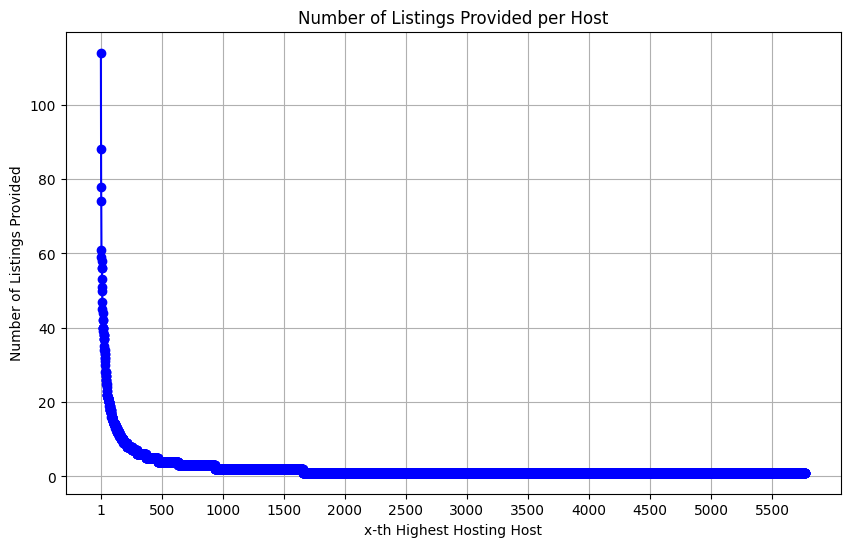

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(xdata, ydata, marker='o', color='blue', linestyle='-')

plt.ylabel('Number of Listings Provided')
plt.xlabel('x-th Highest Hosting Host')
plt.title('Number of Listings Provided per Host')

# Setting our ticks for the x axis to overwrite the default ones,
# and effectively start from the 1st host, all the way to the last with a step of 150
x_ticks = [1] + list(range(500, xdata[-1], 500))
plt.xticks(x_ticks)

plt.grid(True) 

plt.show()


That's why, we can use a logarithmic scale on the x-axis (base 2) to put more focus on the top hosts, where we expect variations in listing counts.At the same time, it lets us recognize and include other hosts in our plot, giving a clearer picture of the entire dataset.

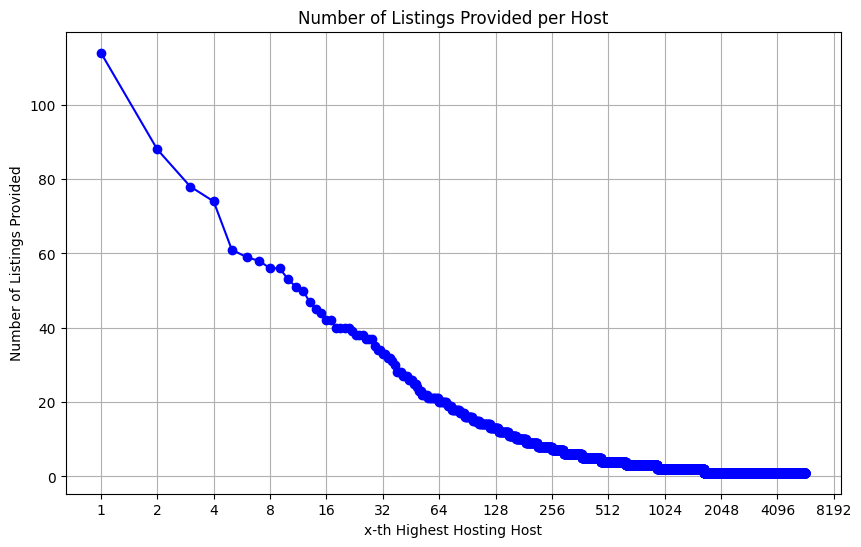

In [72]:
plt.figure(figsize=(10, 6))

xdata_log = np.log2(xdata)

plt.plot(xdata_log, ydata, marker='o', color='blue', linestyle='-')

plt.ylabel('Number of Listings Provided')
plt.xlabel('x-th Highest Hosting Host')
plt.title('Number of Listings Provided per Host')

x_ticks = range(0, 14)
x_tick_labels = [str(pow(2, tick)) for tick in x_ticks]
plt.xticks(x_ticks, x_tick_labels)

plt.grid(True)

plt.show()


## Visualize Listings

Draw an interactive map to show the listings ovelayed on Athens.

You can use the [folium](https://github.com/python-visualization/folium) library to create your map; spend some time reading the documentation.

The map should show each listing and on clicking on top of it, the user should see a short description of the listing.

Note that such a map is heavy on resources. You will probably *not* be able to include it in a Jupyter notebook, so you should save it to an external HTML file that can be opened by any browser. Also, to make things easier, you make wish to limit the maximum zoom level from 12 to 15 (after you read folium's documentation you will know what this is).

Hint: be careful witht he description data, if they contain some characters they may not be rendered in HTML and may destroy your output.

* By leveraging the `folium` library, we can create this interactive map that will display each listing overlayed on Athens.


In [73]:
import folium

* There are some interesting columns that are given us by the dataset, that we could combine and display, whenever the user interacts with each listing on the map.

* Some of them could be:
    
   * A brief listing overview (header).
   * Detailed house description (body).
   * Listing price.
   * A link that redirects them to the actual listing on Airbnb's site.

In [74]:
listings_df[['name','description','price']].head()

,name,description,price
0,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,The apartment is 3-bedroom apartment with 2-ba...,144.0
1,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,Athens Quality Apartments - Deluxe apartment i...,70.0
2,Rental unit in Athens · ★4.84 · Studio · 2 bed...,The Studio is an <br />-excellent located <br ...,85.0
3,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,"AQA No2 is 1-bedroom apartment (47m2), on the ...",60.0
4,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,"Value for money in an central but not ""tourist...",35.0


* We can start by using the `Map` function that will create are actual map with latitude and longtitude the center of Athens, where every listing is located.

In [75]:
ATHENS_CENTER_COORDS = {"latitude":37.983810,"longtitude":23.727539}

map_ = folium.Map(location=[ATHENS_CENTER_COORDS["latitude"], ATHENS_CENTER_COORDS["longtitude"]], zoom_start=12, \
                                                              zoom_end = 15, control_scale=True) 

* We can then set some parameters to control some of our components that are going to displayed in the map.

* `MARKER_RADIUS`: controls how big the markers are going to be displayed
* `MAX_POP_WIDTH`: controls the width of the popup component that is going to get displayed, when click a city
* `MAX_DESC_WORDS:` used in order to not have huge descriptions that could overfill our popup component.
(It's also used in order to not generate huge descriptions that would increase the html file size of the map dramatically)

In [76]:
MARKER_RADIUS = 1
MAX_POP_WIDTH = 160 
MAX_DESC_WORDS = 200

* Then, for each listing in our dataset, we can receive each latitude and longitude location, and some useful information's that our dataset provides and it would be useful to be displayed when clicked by the user.
* `pop_desc` is this description that is going to be shown.
* `CircleMarker` is the actual marker indicating where each listing is located.

In [ ]:
for (index, listing) in listings_df.iterrows():
    latitute = listing['latitude']
    longitude = listing['longitude']
    heading_name = str(listing['name'])
    main_description = str(listing['description'])
    main_price = str(listing['price'])
    listing_url = str(listing['listing_url'])

    # If our description provided by the data set is greater than our threshold, we cut it.
    main_description = main_description[:MAX_DESC_WORDS] + '...' if len(main_description) > MAX_DESC_WORDS \
                                                                                        else main_description
    
    # Creating a "Learn More" link to direct users to the listing URL
    learn_more_link = f'<a href="{listing_url}" target="blank">Learn More</a>'

    # Creating our custom description.
    popup_content = f'<strong>{heading_name}</strong><br><br>' \
                   f'{main_description}...<br><br>' \
                   f'<strong>Price: </strong>{main_price}€<br>' \
                   f'{learn_more_link}'
    
    # Creating each popup, that is going to passed in the CircleMarker
    popup = folium.Popup(html=popup_content, max_width=MAX_POP_WIDTH)
    
    # Creating the actual CircleMarker
    folium.CircleMarker(location=[latitute, longitude], popup=popup, radius=MARKER_RADIUS).add_to(map_)

# Saving our map as an html file.
map_.save('./map.html')